# Programming Task 3  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** (10 marks)
    - Motivate the problem and what you are trying to accomplish in this report
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
    - Provide charts where appropriate
3. **Customer Segmentation** (40 marks)
    - Note: For the purpose of this assignment do not standarise the data
    - Choose the optimal number of customer segments/clusters using one of the methods discussed in lectures
    - After having identified the number of clusters, estimate the clusters using two different clustering techniques
    - Interpret each of the identified clusters (for both clustering techniques) in terms of customer attributes 
        - E.g. there may be a cluster of university educated females living in a mid-sized city
    - Compare and try to match the customer segments identified by the two techniques
4. **Recommendations** (20 marks)
    - Suggest marketing techniques that could be used to target customer segements you identified 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report
6. **Word count** 
    - Include the word count of your document
    
<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   

1. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. I recommend writing the report in Word, and then saving it as a PDF file which will be submitted.
2. Your Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean, easy to understand, and can produce all the output included in the report.  

### 2. Exploratory Data Analysis
We visualize to better understand the distribution and relationship among variables.

In [1]:
import pandas as pd

data = pd.read_csv('data/data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [2]:
data_legend = pd.read_csv('data/data_legend.csv')
data_legend.head()

,Variable,Data type,Range,Description,Unnamed: 4
0,ID,numerical,Integer,Shows a unique identificator of a customer.,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Sex,categorical,"{0,1}",Biological sex (gender) of a customer. In this...,NaN
3,NaN,NaN,0,male,NaN
4,NaN,NaN,1,female,NaN


In [3]:
# Display summary statistics for numerical variables
numerical_summary = data[['Age','Income']].describe()

# Display counts for categorical variables
sex_counts = data['Sex'].value_counts().rename("Sex Counts")
marital_status_counts = data['Marital status'].value_counts().rename("Marital status Counts")
education_counts = data['Education'].value_counts().rename("Education Counts")
occupation_counts = data['Occupation'].value_counts().rename("Occupation Counts")
settlement_counts = data['Settlement size'].value_counts().rename("Settlement Size Counts")

numerical_summary, sex_counts, marital_status_counts, education_counts, occupation_counts, settlement_counts

(               Age         Income
 count  2000.000000    2000.000000
 mean     35.909000  120954.419000
 std      11.719402   38108.824679
 min      18.000000   35832.000000
 25%      27.000000   97663.250000
 50%      33.000000  115548.500000
 75%      42.000000  138072.250000
 max      76.000000  309364.000000,
 0    1086
 1     914
 Name: Sex Counts, dtype: int64,
 0    1007
 1     993
 Name: Marital status Counts, dtype: int64,
 1    1386
 2     291
 0     287
 3      36
 Name: Education Counts, dtype: int64,
 1    1113
 0     633
 2     254
 Name: Occupation Counts, dtype: int64,
 0    989
 1    544
 2    467
 Name: Settlement Size Counts, dtype: int64)

In [4]:
summary_statistics = data[['Age','Income']].describe()
summary_statistics

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


In [5]:
counts_df = pd.DataFrame({
    'Sex': data['Sex'].value_counts(),
    'Marital Status': data['Marital status'].value_counts(),
    'Education': data['Education'].value_counts(),
    'Occupation': data['Occupation'].value_counts(),
    'Settlement Size': data['Settlement size'].value_counts()
})

counts_df_transposed = counts_df.transpose()

counts_df_transposed

,0,1,2,3
Sex,1086.0,914.0,NaN,NaN
Marital Status,1007.0,993.0,NaN,NaN
Education,287.0,1386.0,291.0,36.0
Occupation,633.0,1113.0,254.0,NaN
Settlement Size,989.0,544.0,467.0,NaN


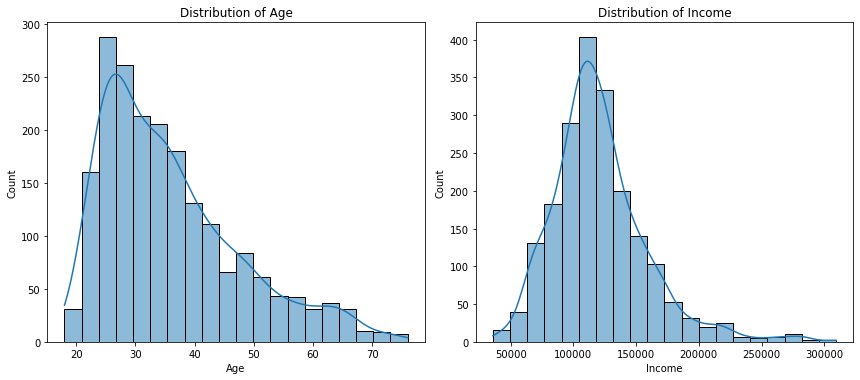

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18, 15))

# Age distribution
plt.subplot(3, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Income distribution
plt.subplot(3, 3, 2)
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Distribution of Income')


plt.tight_layout()
plt.show()


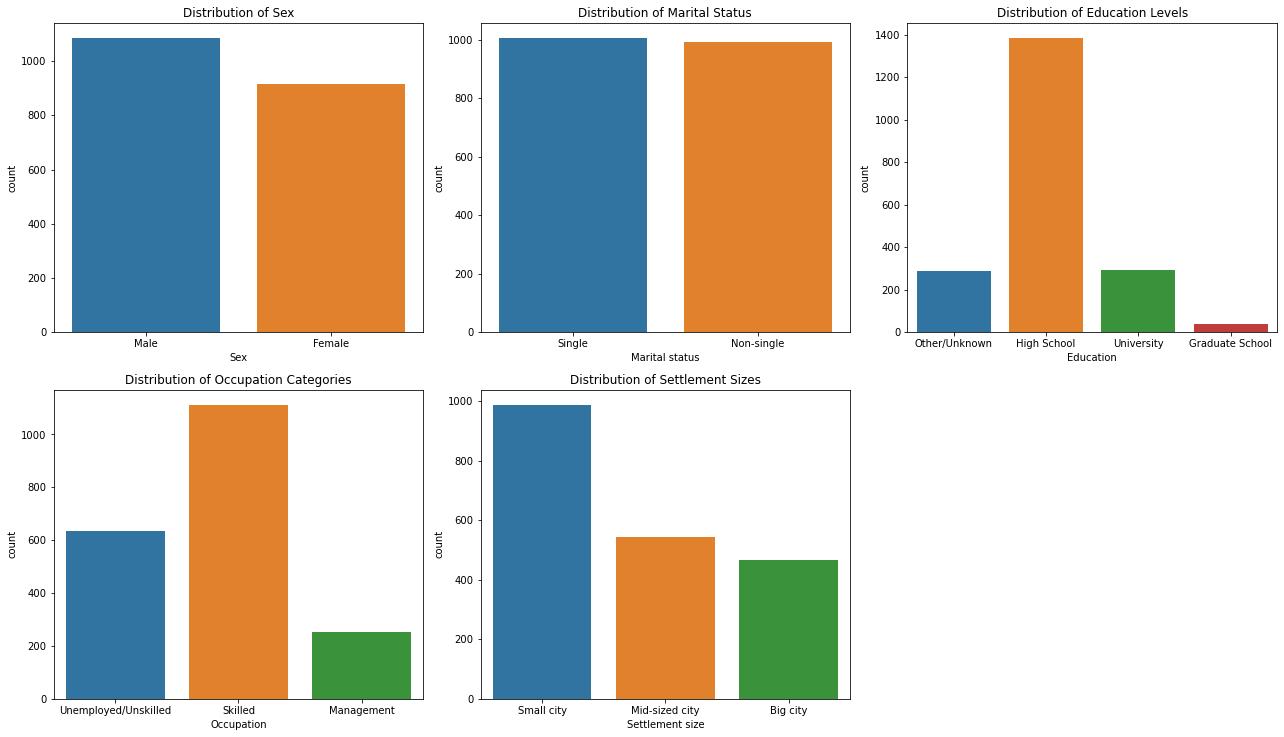

In [7]:
plt.figure(figsize=(18, 15))

# Sex distribution
plt.subplot(3, 3, 1)
sns.countplot(data=data, x='Sex')
plt.title('Distribution of Sex')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# Marital status distribution
plt.subplot(3, 3, 2)
sns.countplot(data=data, x='Marital status')
plt.title('Distribution of Marital Status')
plt.xticks(ticks=[0, 1], labels=['Single', 'Non-single'])

# Education distribution
plt.subplot(3, 3, 3)
sns.countplot(data=data, x='Education')
plt.title('Distribution of Education Levels')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Other/Unknown', 'High School', 'University', 'Graduate School'])

# Occupation distribution
plt.subplot(3, 3, 4)
sns.countplot(data=data, x='Occupation')
plt.title('Distribution of Occupation Categories')
plt.xticks(ticks=[0, 1, 2], labels=['Unemployed/Unskilled', 'Skilled', 'Management'])

# Settlement Size distribution
plt.subplot(3, 3, 5)
sns.countplot(data=data, x='Settlement size')
plt.title('Distribution of Settlement Sizes')
plt.xticks(ticks=[0, 1, 2], labels=['Small city', 'Mid-sized city', 'Big city'])

plt.tight_layout()
plt.show()

### 3. Customer segmentation

#### 3.1. Find the optimal number of clusters:

We will use the Elbow Method to determine the optimal number of clusters (customer segments). 

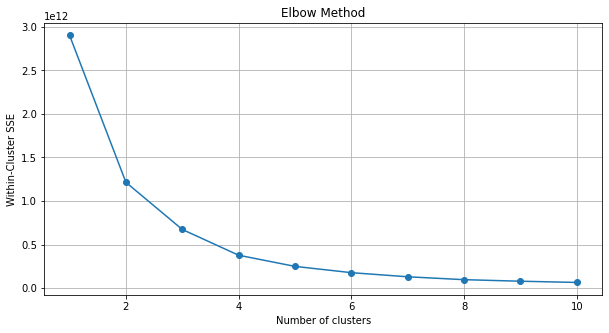

In [8]:
from sklearn.cluster import KMeans

# Remove the 'ID' column as it's just an identifier
data_clustering = data.drop('ID', axis=1)

# Calculate WCSS values for 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_clustering)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster SSE')
plt.grid(True) 
plt.show()


From the Elbow method chart above, we choose the potential optimal number of clusters is 3.

#### 3.2. Estimate Clusters:
We will use two clustering techniques: KMeans and Agglomerative Hierarchical Clustering to estimate the clusters.

###### 3.2.1. Kmeans Clustering:

First of all, we exclude the ID column and group the data into 3 clusters using KMeans clustering.

In [9]:
import pandas as pd
from sklearn.cluster import KMeans

# Drop 'ID' column:
data_clustering = data.drop('ID', axis=1)

# Perform KMeans clustering to identify 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data_clustering['KMeans_Cluster'] = kmeans.fit_predict(data_clustering)

# Check the size of each cluster:
data_clustering['KMeans_Cluster'].value_counts()

0    898
1    889
2    213
Name: KMeans_Cluster, dtype: int64

In [10]:
# Compute the overall mean values of the dataset
overall_means = data_clustering.mean()

overall_means

Sex                     0.4570
Marital status          0.4965
Age                    35.9090
Education               1.0380
Income             120954.4190
Occupation              0.8105
Settlement size         0.7390
KMeans_Cluster          0.6575
dtype: float64

In [11]:
from IPython.display import display
import pandas as pd
# Compute the mean values of each feature for every cluster to understand their characteristics:
kmeans_centroids = data_clustering.groupby('KMeans_Cluster').mean()
display(kmeans_centroids)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
KMeans_Cluster,,,,,,,
0,0.384187,0.447661,37.927617,1.079065,132162.346325,0.998886,0.954343
1,0.569179,0.554556,31.947132,0.920135,90836.787402,0.433071,0.368954
2,0.295775,0.460094,43.934272,1.356808,199404.446009,1.591549,1.375587


##### 3.2.2. Agglomerative Hierarchical Clustering technique:

In [14]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Hierarchical Clustering on the entire dataset
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
data_clustering['Agg_Cluster'] = agg_clustering.fit_predict(data_clustering)

# Check the size of each cluster:
data_clustering['Agg_Cluster'].value_counts()

0    1399
2     491
1     110
Name: Agg_Cluster, dtype: int64

In [23]:

# Compute summary statistics for the numerical variables within each cluster 

# Mean
agg_cluster_means = data_clustering.groupby('Agg_Cluster').mean()

# Median
agg_cluster_medians = data_clustering.groupby('Agg_Cluster').median()

# Mode
agg_cluster_modes = data_clustering.groupby('Agg_Cluster').agg(lambda x: x.mode().iloc[0])

In [24]:
display(agg_cluster_means)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans_Cluster
Agg_Cluster,,,,,,,,
0,0.521086,0.521801,33.533238,0.959257,101944.944246,0.590422,0.515368,0.635454
1,0.290909,0.400000,44.727273,1.345455,223444.563636,1.745455,1.454545,2.000000
2,0.311609,0.446029,40.702648,1.193483,152156.739308,1.228106,1.215886,0.419552


In [25]:
display(agg_cluster_medians)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans_Cluster
Agg_Cluster,,,,,,,,
0,1.0,1.0,31.0,1.0,106043.0,1.0,0.0,1.0
1,0.0,0.0,43.0,1.0,214364.0,2.0,2.0,2.0
2,0.0,0.0,37.0,1.0,149653.0,1.0,1.0,0.0


In [26]:
display(agg_cluster_modes)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans_Cluster
Agg_Cluster,,,,,,,,
0,1,1,26,1,69487,1,0,1
1,0,0,42,2,214364,2,2,2
2,0,0,30,1,133328,1,1,0
